# SALES PREDICTION USING PYTHON

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## Load and Explore the Dataset

In [61]:
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 3)


,Radio,Newspaper,Sales
TV,,,
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9


In [62]:
### Get summary of statistics of the data
df.describe()

,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000
mean,23.264000,30.554000,15.130500
std,14.846809,21.778621,5.283892
min,0.000000,0.300000,1.600000
25%,9.975000,12.750000,11.000000
50%,22.900000,25.750000,16.000000
75%,36.525000,45.100000,19.050000
max,49.600000,114.000000,27.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 230.1 to 232.1
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Radio      200 non-null    float64
 1   Newspaper  200 non-null    float64
 2   Sales      200 non-null    float64
dtypes: float64(3)
memory usage: 6.2 KB


## Handling Missing Values

In [64]:
df.isnull().sum()*100/df.shape[0]

Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


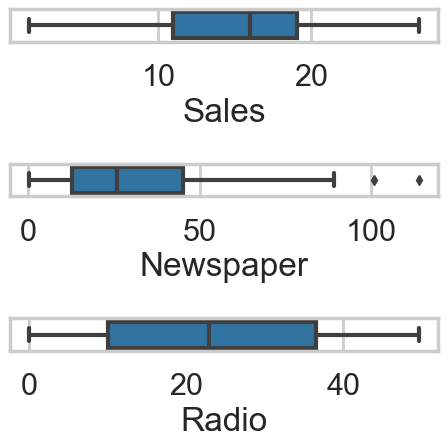

In [65]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Sales'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

## Exploratory Data Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


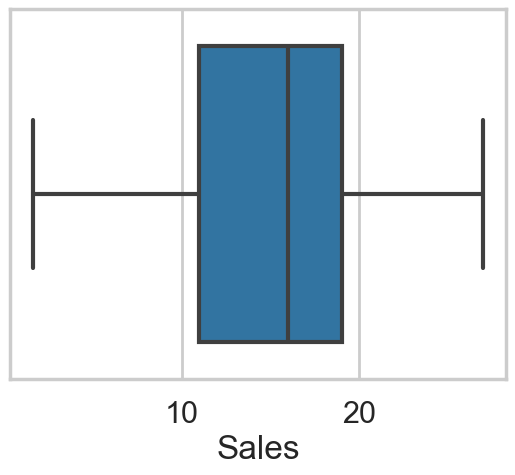

In [66]:
sns.boxplot(df['Sales'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_31660\1455080135.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

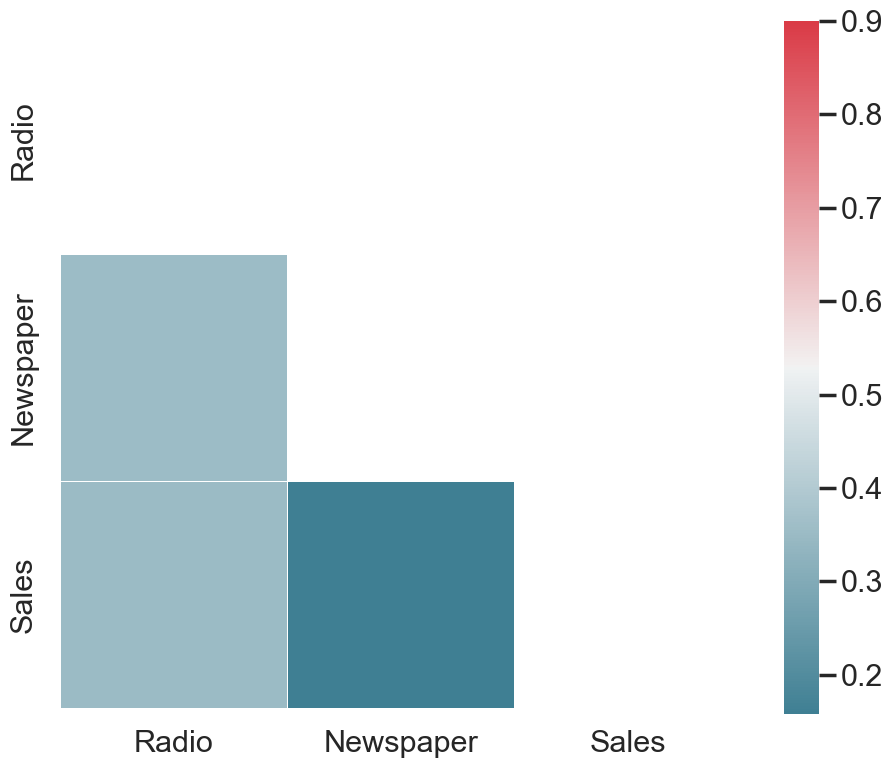

In [67]:

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Sales vs Radio')

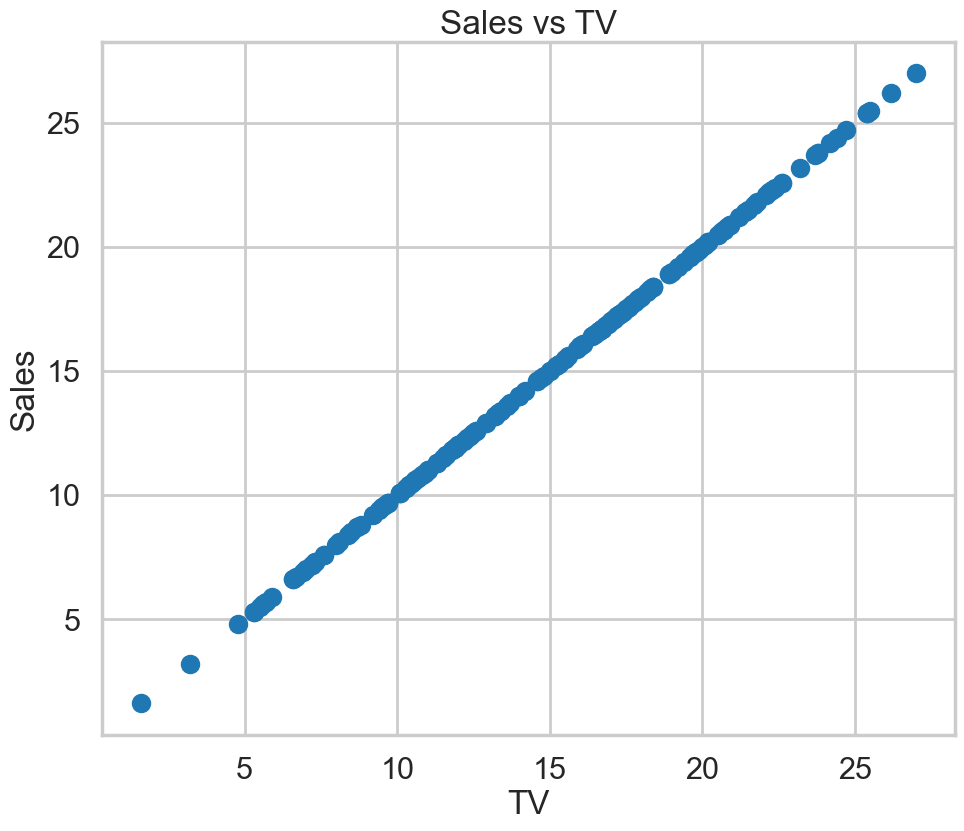

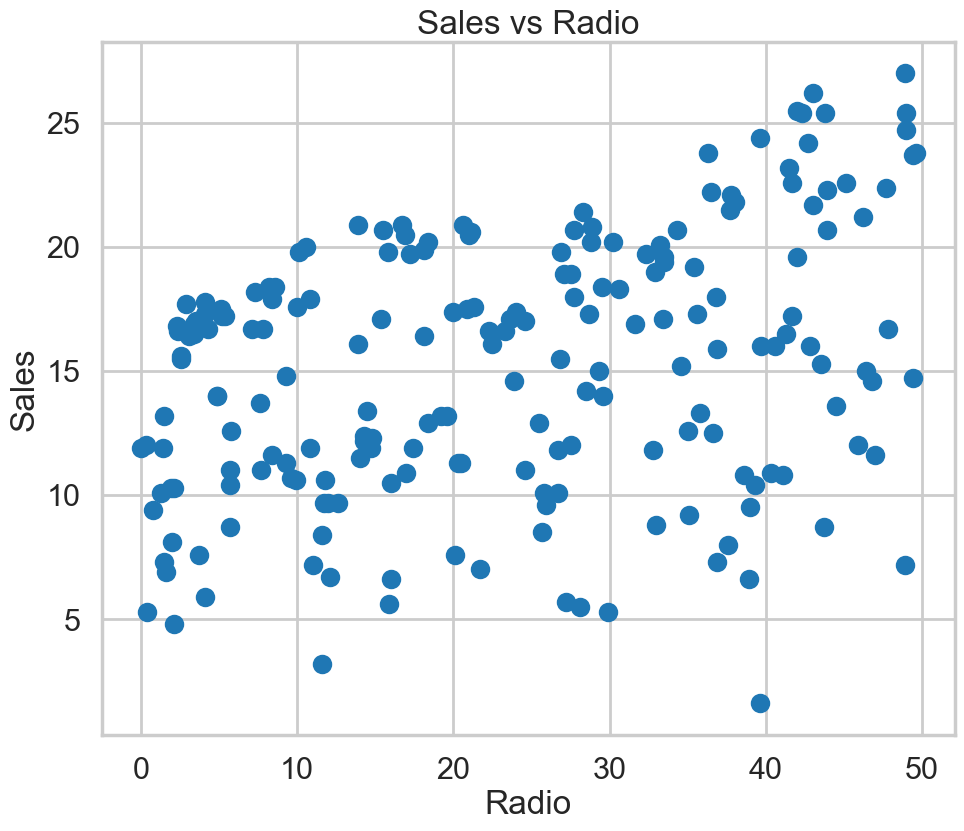

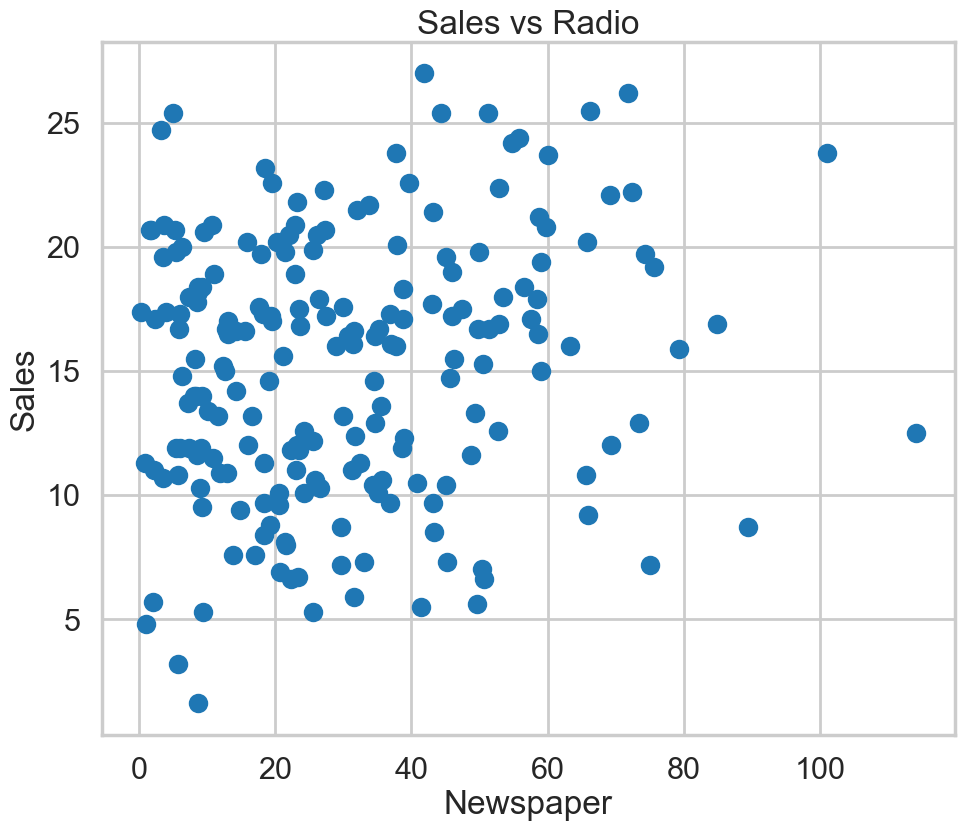

In [68]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Sales"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

Text(0.5, 1.0, 'Radio vs Radio')

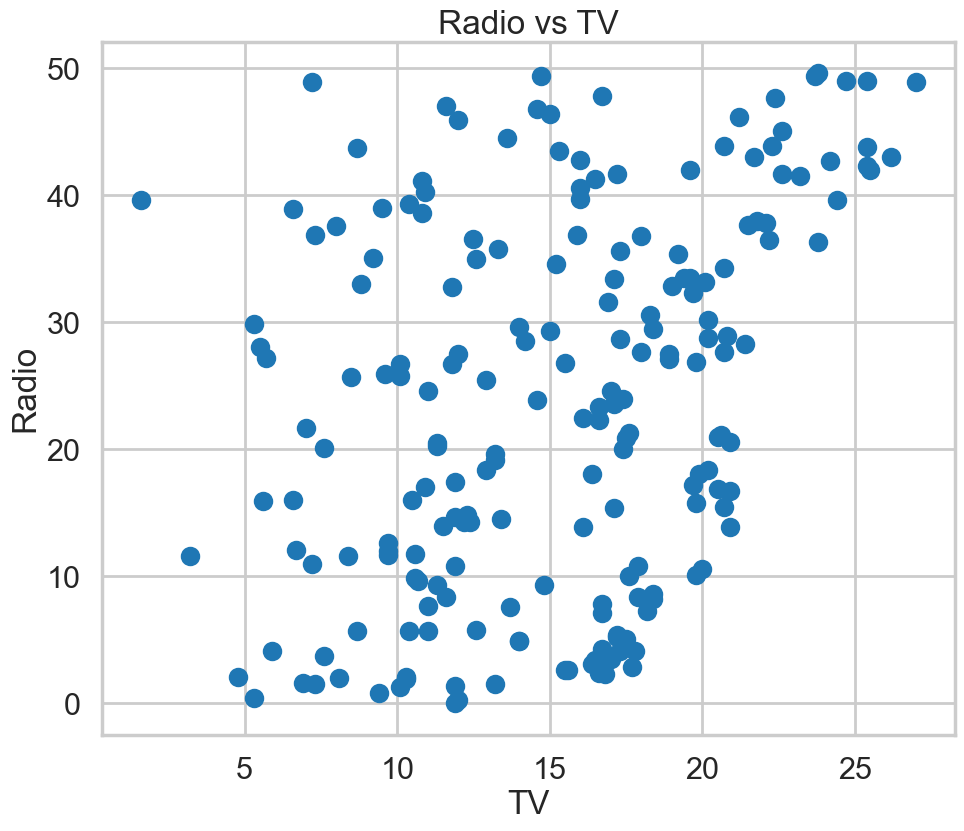

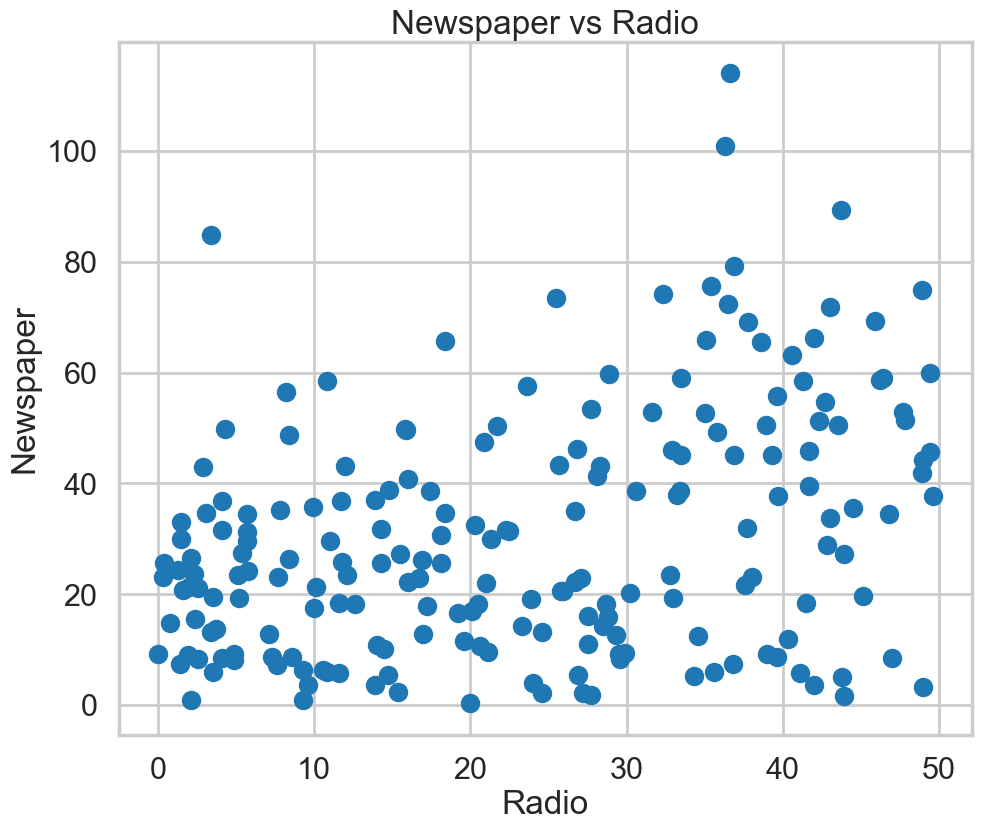

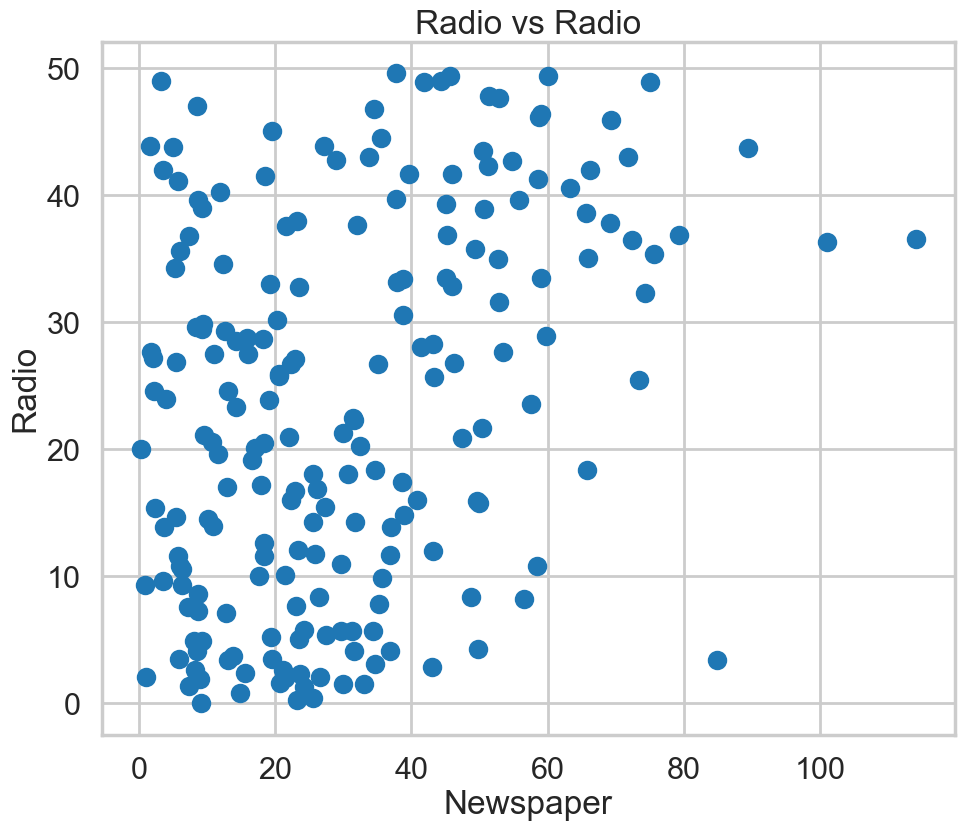

In [69]:

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Sales"], df["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")

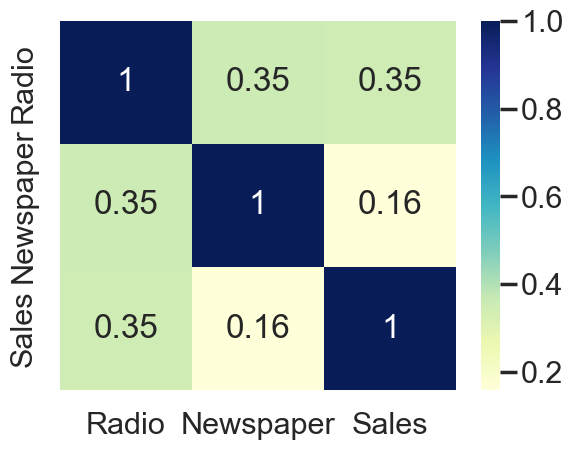

In [70]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()


## Prep the Data for Modelling

In [71]:
x = df.drop("Sales", axis = 1)
y = df["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 2)
       Radio  Newspaper
TV                     
230.1   37.8       69.2
44.5    39.3       45.1
17.2    45.9       69.3
151.5   41.3       58.5
180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
TV
230.1    22.1
44.5     10.4
17.2     12.0
151.5    16.5
180.8    17.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 2)
y_train size: (150,)

x_test size: (50, 2)
y_test size: (50,)


In [73]:
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

## Build then Evaluate the Models
### Linear Regression

In [74]:
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

## Using all predictors

R2: -7.883941350164598
MAE: 4.39446886966246
MSE: 25.438449517182853
RMSE: 5.04365438121833
Cross-Val Results: [-0.12292638 -0.00268817  0.17497033  0.08518113  0.16890213  0.15997837
 -0.2980342   0.12706696 -0.21404767  0.28103703]
Cross-Val Mean: 0.035943952956304794


C:\Users\hp\AppData\Local\Temp\ipykernel_31660\765026562.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(linreg_all_results, ignore_index=True)


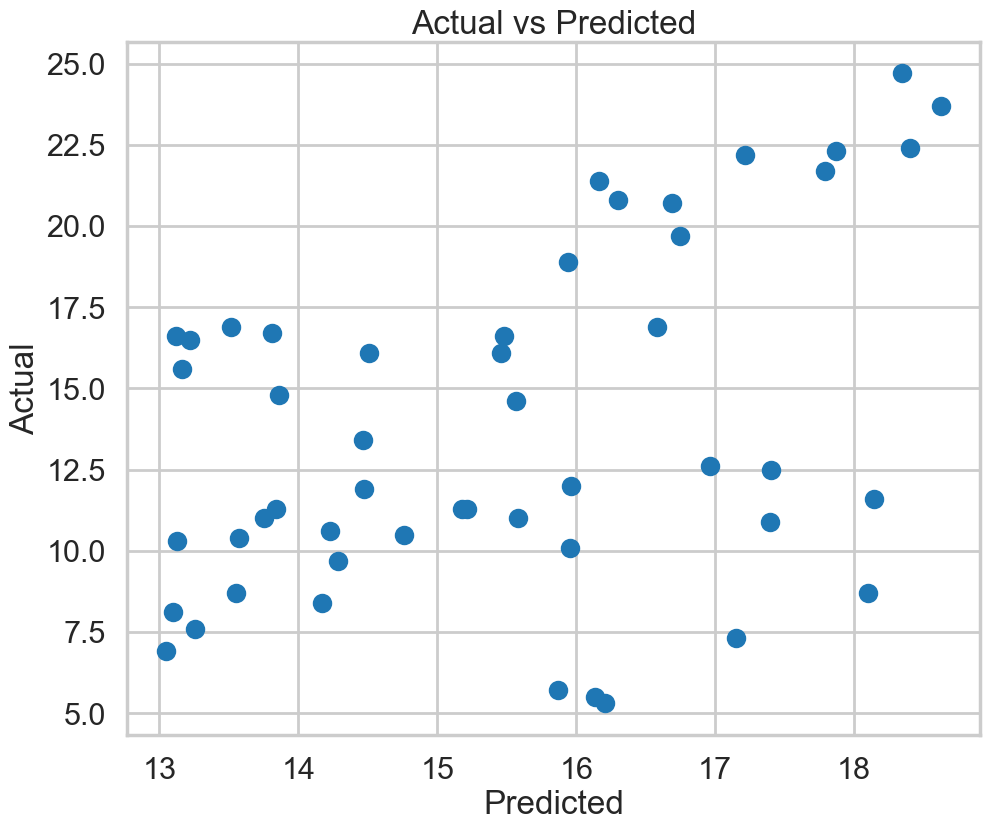

In [75]:
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_all_results, ignore_index=True)

## Conclusion

In [76]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,-788.394135,4.394469,25.43845,5.043654,3.594395
